In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:/Users/djnag/Downloads/Mall_Customers.csv", encoding = "ISO-8859-1")

In [3]:
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]

In [5]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[features])

In [7]:
kmeans = KMeans(n_clusters=3)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.3, min_samples=5)
meanshift = MeanShift()

In [8]:
clustering_algorithms = [kmeans, agglomerative, dbscan, meanshift]
clustering_labels = ['KMeans', 'Agglomerative Clustering', 'DBSCAN', 'MeanShift']

In [9]:
evaluation_scores = {'Silhouette Score': [], 'Calinski-Harabasz Score': [], 'Davies-Bouldin Score': []}

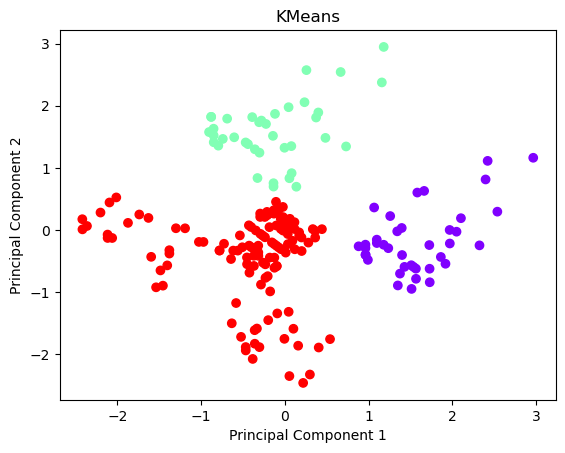

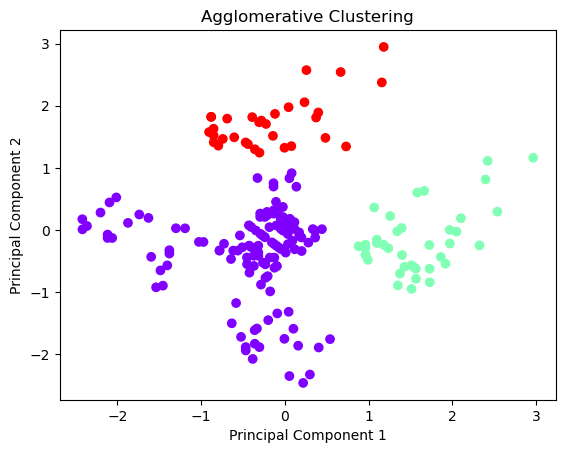

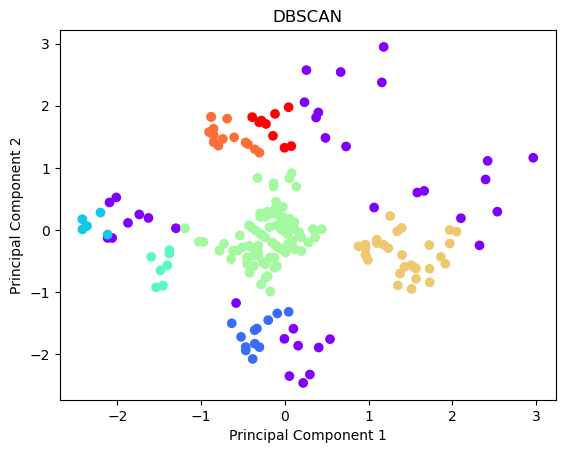

The MeanShift algorithm could not generate more than one cluster.


In [11]:
for i, clustering_algorithm in enumerate(clustering_algorithms):
    # Fit the model to the data
    clustering_algorithm.fit(df_pca)

    # Predict the clusters for the data
    labels = clustering_algorithm.labels_

    # Check if more than one cluster is generated
    if len(np.unique(labels)) > 1:
        # Calculate the evaluation metrics
        silhouette = silhouette_score(df_pca, labels)
        calinski_harabasz = calinski_harabasz_score(df_pca, labels)
        davies_bouldin = davies_bouldin_score(df_pca, labels)

        # Store the evaluation scores
        evaluation_scores['Silhouette Score'].append(silhouette)
        evaluation_scores['Calinski-Harabasz Score'].append(calinski_harabasz)
        evaluation_scores['Davies-Bouldin Score'].append(davies_bouldin)

        # Plot the data with the clusters
        plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap="rainbow")
        plt.title(clustering_labels[i])
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
    else:
        print(f"The {clustering_labels[i]} algorithm could not generate more than one cluster.")

    # Explain the plot and evaluation scores as before


In [15]:
if isinstance(clustering_algorithm, KMeans):
        # KMeans Clustering
        # This plot shows the data points with clusters assigned by the KMeans algorithm.
        # Each data point is represented by a dot, and the color of the dot represents its assigned cluster.
        # The clusters are determined based on the proximity of data points in the reduced 2-dimensional space.
        pass
elif isinstance(clustering_algorithm, AgglomerativeClustering):
        # Agglomerative Clustering
        # This plot shows the data points with clusters assigned by the Agglomerative Clustering algorithm.
        # Each data point is represented by a dot, and the color of the dot represents its assigned cluster.
        # The clusters are determined based on the hierarchical agglomerative process.
        pass
elif isinstance(clustering_algorithm, DBSCAN):
        # DBSCAN Clustering
        # This plot shows the data points with clusters assigned by the DBSCAN algorithm.
        # Each data point is represented by a dot, and the color of the dot represents its assigned cluster.
        # The clusters are determined based on density connectivity of data points.
        pass
elif isinstance(clustering_algorithm, MeanShift):
        # MeanShift Clustering
        # This plot shows the data points with clusters assigned by the MeanShift algorithm.
        # Each data point is represented by a dot, and the color of the dot represents its assigned cluster.
        # The clusters are determined based on the density estimation and mean shift algorithm.
        pass


In [26]:
# Print the evaluation scores for each algorithm
for metric, scores in evaluation_scores.items():
    print(f"\nEvaluation scores for {metric}:")
    for i, score in enumerate(scores):
        print(f"{clustering_labels[i]}: {score}")

# Determine the best clustering algorithm based on the evaluation scores
# Calculate the Calinski-Harabasz scores for each clustering algorithm
# Determine the best clustering algorithm based on the evaluation scores
best_algorithm = max(evaluation_scores['Calinski-Harabasz Score'], key=lambda x: x)
best_index = evaluation_scores['Calinski-Harabasz Score'].index(best_algorithm)
best_algorithm_name = clustering_labels[best_index]
print("\nThe best clustering algorithm is:", best_algorithm_name)



Evaluation scores for Silhouette Score:
KMeans: 0.46658474419000134
Agglomerative Clustering: 0.46104814465704463
DBSCAN: 0.3161412197673119

Evaluation scores for Calinski-Harabasz Score:
KMeans: 151.33512126359474
Agglomerative Clustering: 143.77956237851723
DBSCAN: 32.656415388075644

Evaluation scores for Davies-Bouldin Score:
KMeans: 0.7164821569435489
Agglomerative Clustering: 0.7072871869794292
DBSCAN: 2.025069803437564

The best clustering algorithm is: KMeans


In [1]:
!pip freeze > requirements.txt